In [153]:
from os.path import expanduser
import csv
import time
import matplotlib.pyplot as plt
import numpy as np

home = expanduser('~')
file = open(home+'/sim_ws/src/bsc_anomaly/test_results/longitude-(3, 10, 12, 37, 4).csv', 'r')
csv_reader = csv.reader(file, delimiter=',')

In [154]:
print(file)
line_count = 0
x_list = []
y_list = []
yaw_list = []
speed_list = []
time_list = []
for row in csv_reader:
        if line_count == 0:
            print(f'{",         ".join(row)}')
            line_count += 1
        else:
            if (time_list == [] or float(row[4]) > time_list[-1]+0):
                x_list.append(float(row[0]))
                y_list.append(float(row[1]))
                yaw_list.append(float(row[2]))
                speed_list.append(float(row[3]))
                time_list.append(float(row[4]))
            #print(f'{row[0]}, {row[1]},  {row[2]}, {row[3]}, {row[4]}')
                line_count += 1

<_io.TextIOWrapper name='/home/kevinschonberg/sim_ws/src/bsc_anomaly/test_results/longitude-(3, 10, 12, 37, 4).csv' mode='r' encoding='UTF-8'>
x,         y,         yaw,         speed,         time


In [155]:
from scipy import signal

N = 1
Wn = 10
b, a = signal.butter(N, Wn, 'low', analog= True)

from scipy.signal import savgol_filter

#speed_list_filteret = signal.lfilter(b, a, speed_list)


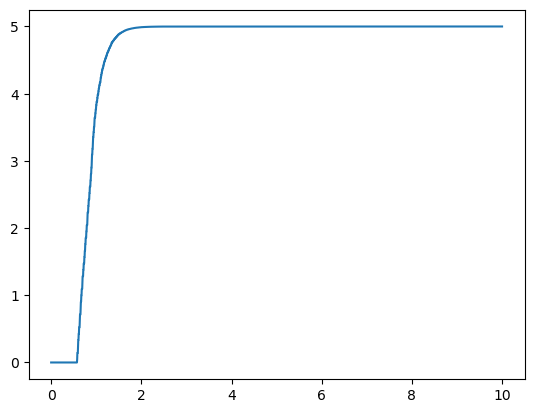

In [156]:
# Return double of n
def setuptime(n):
    return n - time_list[0]
 
# We double all numbers using map()
corrected_time = list(map(setuptime, time_list))

data_points = np.linspace(0,corrected_time[-1],len(time_list))

plt.plot(data_points, speed_list)
#plt.xlim(0, 2)
plt.show()

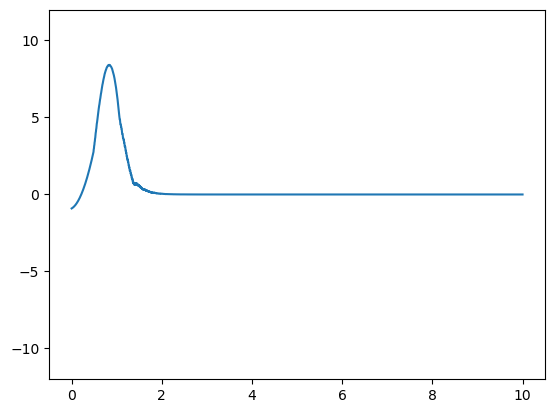

In [157]:
acceleration_list = [0]
for n in range(len(speed_list)-1):
    acceleration_list.append((speed_list[n+1]-speed_list[n])/(data_points[n+1]-data_points[n]))


acceleration_list_filteret = savgol_filter(acceleration_list, 201, 2)

plt.plot(data_points, acceleration_list_filteret)
#plt.xlim(0, 2)
plt.ylim(-12,12)
plt.show()

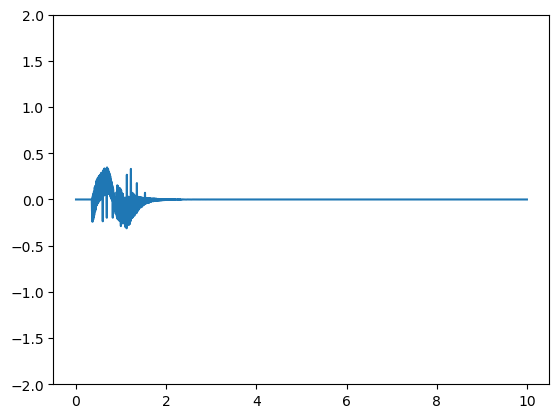

In [152]:
jerk_list = [0]
for n in range(len(acceleration_list)-1):
    jerk_list.append((acceleration_list[n+1]-acceleration_list[n]))

jerk_list_filteret = savgol_filter(jerk_list, 101, 2)

plt.plot(data_points, jerk_list_filteret)
#plt.xlim(0.7, 1)
plt.ylim(-2,2)
plt.show()

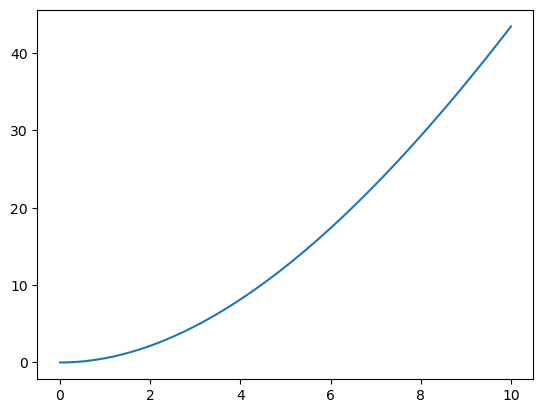

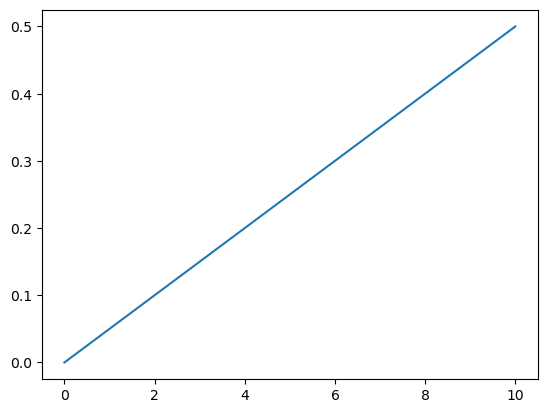

In [119]:
C = 1.14
wv = np.linspace(0, 10, 100)
t = 10
sr = wv * 0.05
L = (1-np.exp(-C * abs(sr))) * wv * t


plt.plot(wv, L)
plt.show()

plt.plot(wv, sr)
plt.show()

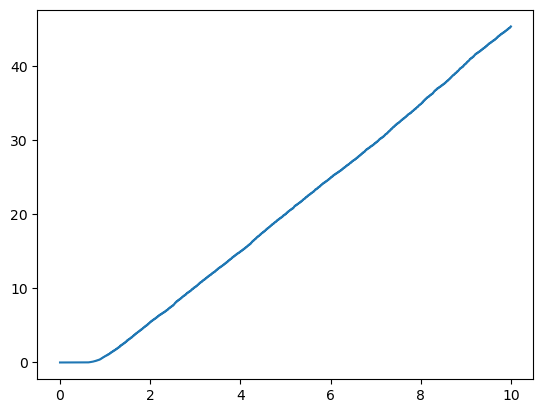

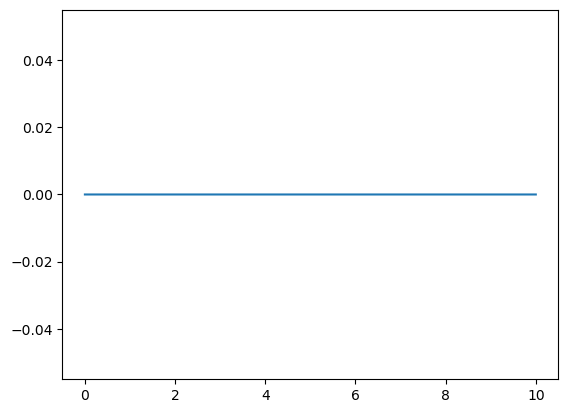

In [165]:
plt.plot(data_points, list(map(lambda x: x + 78, x_list)))
plt.show()

plt.plot(data_points, list(map(lambda x: x + 28, y_list)))
plt.show()

In [167]:
np.average(speed_list)

4.5572282685409595

In [171]:
(x_list[-1] + 78) / data_points[-1]

4.531870347063764